<a href="https://colab.research.google.com/github/PavelNdjawa/Data_TDI/blob/master/Expresso_Churn_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#import data
train = pd.read_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/Train.csv')
test=  pd.read_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/Test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/SampleSubmission.csv')

In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [ ]:
train.shape

(2154048, 19)

In [ ]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [ ]:
test.shape

(380127, 18)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [ ]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [ ]:
submission.shape

(380127, 2)

In [ ]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

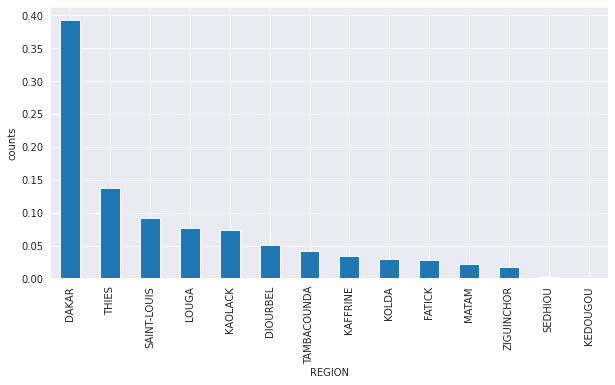

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

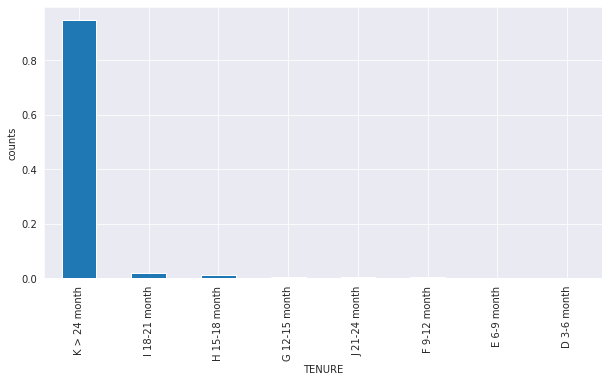

In [ ]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

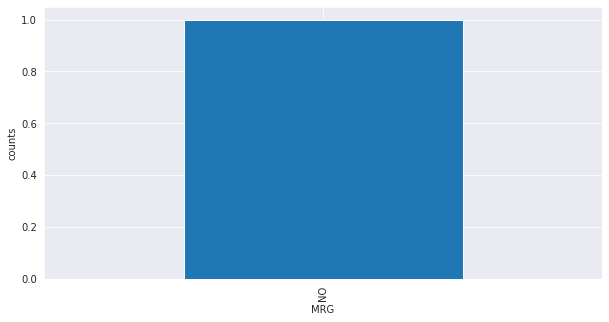

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
Data_Mifi_20Go                         1
YMGX on-net 100=700F, 24H              1
1500=Unlimited7Day                     1
GPRS_5Go_7D_PORTAL                     1
FIFA_TS_monthly                        1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

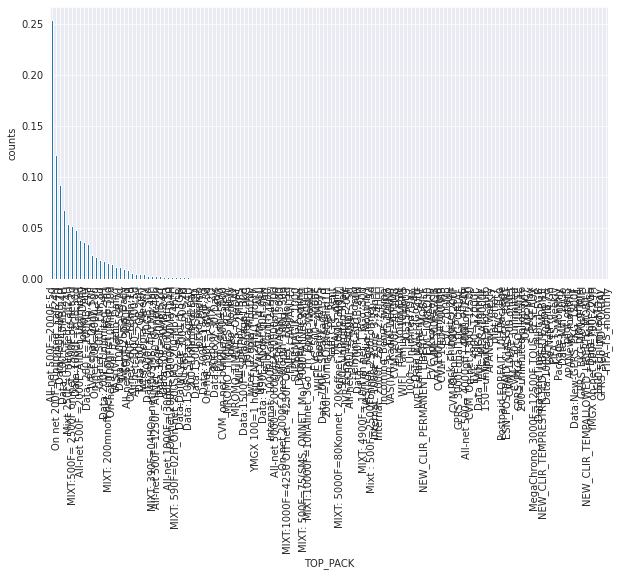

In [ ]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

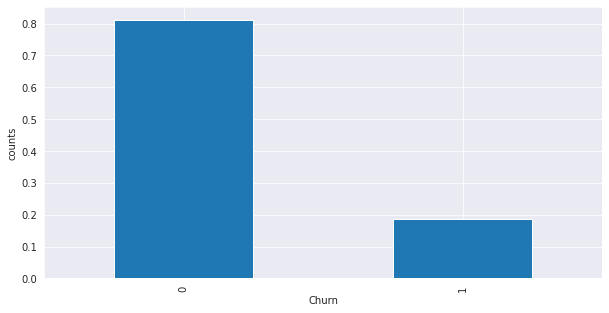

In [ ]:
#Check if the predictor class is balanced
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [ ]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [ ]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [ ]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [ ]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [ ]:
train.drop(columns=['REGION', 'MRG', 'TENURE'], inplace=True) #drop these columns

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
test.drop(columns=['REGION', 'MRG', 'TENURE'], inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN


In [ ]:
#Fill NAs for train data

In [ ]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
train["TOP_PACK"] = encoder.fit_transform(train["TOP_PACK"])
train["user_id"] = encoder.fit_transform(train["user_id"])
# train["TENURE"] = encoder.fit_transform(train["TENURE"])

In [ ]:
train['TOP_PACK'].fillna((train['TOP_PACK'].mean()), inplace=True)

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,7,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,54,107,8.000000,0
1,1,5,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,4,140,9.272461,1
2,2,7,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,8.170132,7.553309,17,108,1.000000,0
3,3,7,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,8.170132,7.553309,62,35,11.000000,0
4,4,7,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,8.170132,7.553309,11,100,2.000000,0


In [ ]:
test["TOP_PACK"] = encoder.fit_transform(test["TOP_PACK"])
test["user_id"] = encoder.fit_transform(test["user_id"])
# test["TENURE"] = encoder.fit_transform(test["TENURE"])

In [ ]:
test['TOP_PACK'].fillna((test['TOP_PACK'].mean()), inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,0,7,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,76,5.0
1,1,5,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,17,1.0
2,2,7,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,17,22.0
3,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,102,NaN
4,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,102,NaN


In [ ]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [ ]:
#Fill NAs for test data

In [ ]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,0,7,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,8.164663,7.6553,42,76,5.000000
1,1,5,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,8.164663,7.6553,41,17,1.000000
2,2,7,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,8.164663,7.6553,57,17,22.000000
3,3,7,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,9,102,9.261584
4,4,7,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,10,102,9.261584


In [ ]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import copy
import random
import os
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

In [ ]:
# for reprocducibility
def seed_all(seed):
  torch.manual_seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  np.random.seed(seed)
  random.seed(seed)
  torch.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

In [ ]:
seed=0
seed_all(seed)

In [ ]:
seed_all(seed)
dropcols = ['CHURN']
y = train['CHURN']
X = train.drop(columns=dropcols, axis=1)
# test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(X.shape)
print(y.shape)
print(test.shape)

(2154048, 16)
(2154048,)
(380127, 16)


In [ ]:
#Standardize numeric columns

In [ ]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK','TENURE', 'user_id', 'TOP_PACK']

In [ ]:
seed_all(seed)
scaler = StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.MaxAbsScaler()

In [ ]:
seed_all(seed)
train[num_cols] = scaler.fit_transform(train[num_cols])

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,-1.732050,0.211319,-2.238504e-01,3.246513e-01,-2.152853e-01,-2.152889e-01,2.525787e-01,-3.546942e-01,1.586511e-01,-3.153654e-01,-5.490724e-01,-6.204583e-01,-6.579922e-01,1.164700,0.304622,-1.359412e-01,0
1,-1.732048,-2.783691,2.666446e-17,-1.265232e-16,2.355032e-17,9.736025e-17,4.838079e-17,-1.541542e-17,1.092124e-17,-1.303179e-17,2.110634e-17,2.649086e-19,1.125218e-18,-1.078775,0.959779,2.443638e-17,1
2,-1.732047,0.211319,-3.373367e-01,-8.913132e-01,-7.674215e-01,-7.674261e-01,-1.001180e+00,-1.541542e-17,-2.699380e-01,-3.153654e-01,-4.000654e-01,2.649086e-19,1.125218e-18,-0.495472,0.324475,-8.837738e-01,0
3,-1.732045,0.211319,1.391147e+00,3.246513e-01,1.365591e+00,1.365761e+00,3.361627e-01,4.265629e+00,-3.404107e-01,4.199848e-02,-5.242379e-01,2.649086e-19,1.125218e-18,1.523656,-1.124810,1.845585e-01,0
4,-1.732044,0.211319,-7.912821e-01,-9.848489e-01,-7.734026e-01,-7.735780e-01,-1.084764e+00,-1.541542e-17,-3.432872e-01,-4.557583e-01,2.110634e-17,2.649086e-19,1.125218e-18,-0.764689,0.165650,-7.769406e-01,0


In [ ]:
seed_all(seed)
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,-1.732050,0.211319,-0.092905,-0.610706,-0.087291,-0.087123,-0.750428,-0.002147,0.144269,-0.538718,-0.449734,-0.000473,0.012084,0.626266,-0.310828,-0.456441
1,-1.732048,-2.783691,-0.913498,-0.891313,-0.886017,-0.885851,-0.917596,-0.313238,0.001607,-0.608914,-0.001420,-0.000473,0.012084,0.581396,-1.482168,-0.883774
2,-1.732047,0.211319,-0.389715,1.260009,-0.360710,-0.360885,1.004834,0.399115,-0.399378,-0.596151,-0.449734,-0.000473,0.012084,1.299308,-1.482168,1.359724
3,-1.732045,0.211319,-0.001250,-0.000867,-0.001902,-0.001902,-0.001687,-0.002147,0.001607,-0.001440,-0.001420,-0.000473,0.012084,-0.854428,0.205356,-0.001162
4,-1.732044,0.211319,-0.001250,-0.000867,-0.001902,-0.001902,-0.001687,-0.002147,0.001607,-0.001440,-0.001420,-0.000473,0.012084,-0.809558,0.205356,-0.001162


In [ ]:
#Split training data into train and test split

In [ ]:
seed_all(seed)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=8675309)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1723238, 16)
(1723238,)
(430810, 16)
(430810,)


In [ ]:
st_x= MinMaxScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [ ]:
seed_all(seed)
#The data is stored in a DMatrix object
#label is used to define our outcome variable
# dtrain=xgb.DMatrix(X_train,label=y_train)
# dtest=xgb.DMatrix(X_test)

dtrain = lgb.Dataset(X_train,label=y_train)

In [ ]:
seed_all(seed)
#setting parameters for xgboost
# parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.75}

# #setting parameters for lightgbm(lgb)
param = {'num_leaves':512, 'subsample': 1,'max_depth':9,'learning_rate':0.1,'max_bin':200, 'feature_fraction': 0.9}
param['metric'] = ['auc', 'binary_logloss']

In [ ]:
# seed_all(seed)
########### Train model #######################
###### we used the ensemble method ############
###############################################
# estimators = [('cb', CatBoostClassifier( loss_function='CrossEntropy', depth=9, learning_rate=0.295, iterations=76, random_seed=8675309, eval_metric='AUC',min_child_samples=3) ) ]
# model = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression(penalty='l2',dual=False, tol=10, C=0.1, fit_intercept=True,
# class_weight='balanced', random_state=1, solver='saga', max_iter=100,multi_class='multinomial')  )

In [ ]:
# def classify(X, y, cl, name=''):
#     """Classification using gene features"""

#     from sklearn.metrics import classification_report, accuracy_score
#     np.random.seed()
#     ind = np.random.permutation(len(X))

#     from sklearn.cross_validation import train_test_split
#     Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, test_size=0.4)
#     #print X
#     cl.fit(Xtrain, ytrain)
#     ypred = cl.predict(Xtest)

#     print (classification_report(ytest, ypred))
#     #print accuracy_score(ytest, ypred)
#     from sklearn import cross_validation
#     yl = pd.Categorical(y).labels
#     sc = cross_validation.cross_val_score(cl, X, yl, scoring='roc_auc', cv=5)
#     print("AUC: %0.2f (+/- %0.2f)" % (sc.mean(), sc.std() * 2))
#     return cl

In [ ]:
seed_all(seed)
# model = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
# model = RandomForestClassifier(bootstrap=True,criterion = "entropy", max_depth=15, n_estimators=100, random_state=8675309 )
model = CatBoostClassifier( loss_function='CrossEntropy', depth=9, learning_rate=0.295, iterations=152, random_seed=8675309, eval_metric='AUC',min_child_samples=3)
# RandomForestClassifier( class_weight='balanced_subsample',n_estimators=39,criterion='entropy',min_samples_split=20,ccp_alpha=0.000008)
# model =LogisticRegression(penalty='l2',dual=False, tol=10, C=0.1, fit_intercept=True,
# class_weight='balanced', random_state=1, solver='saga', max_iter=100,multi_class='multinomial')

In [ ]:
# seed_all(seed)
# pipeline = Pipeline(steps=[('t', scaler), ('m', model)])
# # evaluate the pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=8675309)
# n_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# # report pipeline performance
# print('AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
seed_all(seed)
#training our model
num_round=55
from datetime import datetime
start = datetime.now()
# model_xgb = xgb.train(parameters,dtrain,num_round)
model_lgb = lgb.train(param,dtrain,num_round)
stop = datetime.now()

In [ ]:
seed_all(seed)
# Execution time of the model
execution_time_lgb = stop-start
execution_time_lgb

datetime.timedelta(seconds=14, microseconds=145171)

In [ ]:
seed_all(seed)
#datetime.timedelta( , , ) representation => (days , seconds , microseconds)
# #now predicting our model on test set
# ypred = model_xgb.predict(dtest)
ypred = model_lgb.predict(X_test)
ypred

array([0.00679746, 0.39870584, 0.13395354, ..., 0.00428773, 0.00973666,
       0.10079253])

In [ ]:
# #Converting probabilities into 1 or 0
# for i in range(0,9769):
#     if ypred[i]>=.5:       # setting threshold to .5
#        ypred[i]=1
#     else:
#        ypred[i]=0

In [ ]:
# seed_all(seed)
# #calculating accuracy of our model
# from sklearn.metrics import accuracy_score
# accuracy_xgb = accuracy_score(y_test,ypred)
# print(ccuracy_xgb)

In [ ]:
# seed_all(seed)
# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, ypred, pos_label=1)

# # roc curve for tpr = fpr
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
seed_all(seed)
# auc scores
auc_lgb = roc_auc_score(y_test, ypred)

print(auc_lgb)

0.9033492247217068


In [ ]:
seed_all(seed)
# Fit model on data
randmodel = model.fit(X_train,y_train)

0:	total: 387ms	remaining: 58.5s
1:	total: 765ms	remaining: 57.4s
2:	total: 1.17s	remaining: 58.1s
3:	total: 1.57s	remaining: 58s
4:	total: 1.95s	remaining: 57.2s
5:	total: 2.3s	remaining: 56.1s
6:	total: 2.67s	remaining: 55.2s
7:	total: 3.04s	remaining: 54.8s
8:	total: 3.39s	remaining: 53.9s
9:	total: 3.76s	remaining: 53.4s
10:	total: 4.12s	remaining: 52.8s
11:	total: 4.43s	remaining: 51.7s
12:	total: 4.82s	remaining: 51.5s
13:	total: 5.17s	remaining: 50.9s
14:	total: 5.55s	remaining: 50.7s
15:	total: 5.92s	remaining: 50.3s
16:	total: 6.23s	remaining: 49.5s
17:	total: 6.59s	remaining: 49s
18:	total: 6.93s	remaining: 48.5s
19:	total: 7.27s	remaining: 48s
20:	total: 7.58s	remaining: 47.3s
21:	total: 7.92s	remaining: 46.8s
22:	total: 8.28s	remaining: 46.5s
23:	total: 8.63s	remaining: 46s
24:	total: 8.97s	remaining: 45.6s
25:	total: 9.3s	remaining: 45.1s
26:	total: 9.67s	remaining: 44.8s
27:	total: 9.94s	remaining: 44s
28:	total: 10.3s	remaining: 43.5s
29:	total: 10.6s	remaining: 43.1s
30

In [ ]:
seed_all(seed)
#Predict on the X_test data
pred = randmodel.predict(X_test)
pred_prob = randmodel.predict_proba(X_test)

In [ ]:
seed_all(seed)
print(pred_prob)

[[0.99398842 0.00601158]
 [0.6061243  0.3938757 ]
 [0.87523219 0.12476781]
 ...
 [0.99613738 0.00386262]
 [0.99033111 0.00966889]
 [0.90961608 0.09038392]]


In [ ]:
# seed_all(seed)
# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# # roc curve for tpr = fpr
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
seed_all(seed)
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.9035224412036497


In [ ]:
seed_all(seed)
print("Acuracy")
accuracy_score(y_test, pred)

Acuracy


0.8660592836749379

In [ ]:
# seed_all(seed)
# print("Recall")
# recall_score(y_test, pred)

In [ ]:
# seed_all(seed)
# print("F1 Score")
# f1_score(y_test, pred)

In [ ]:
# seed_all(seed)
# confusion_matrix(y_test, ypred)

In [ ]:
# Making a submission

In [ ]:
ss = pd.read_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/SampleSubmission.csv')

In [ ]:
seed_all(seed)
subpred = randmodel.predict_proba(test)[:,1]

In [ ]:
# seed_all(seed)
# dtest1=xgb.DMatrix(test)
# subpred = model_xgb.predict(dtest1)

In [ ]:
# seed_all(seed)
# subpred = model_lgb.predict(test)

In [ ]:
seed_all(seed)
ss["CHURN"] = subpred

In [ ]:
ss.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.077872
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.034426
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.194540
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.666798
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.666798


In [ ]:
seed_all(seed)
#Save submission dataframe in the drive to CSV
#print("[INFO] Saving Predicition to CSV")
ss.to_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/Sub8.csv',columns=["user_id","CHURN"], index = False)

In [ ]:
# seed_all(seed)
# submission.head()

In [ ]:
# seed_all(seed)
# test.head()

In [ ]:
# seed_all(seed)
# subpred = randmodel.predict_proba(test)

In [ ]:
# seed_all(seed)
# subpred

In [ ]:
# pwd

In [ ]:
# cd '/content/drive/MyDrive/Expresso Churn Prediction Challenge/'

In [ ]:
# seed_all(seed)
# SampleSubmission["CHURN"] = subpred

In [ ]:
# submission.head()

In [ ]:
# seed_all(seed)
# submission.to_csv('/content/drive/MyDrive/Expresso Churn Prediction Challenge/su3.csv', index=False)

In [ ]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go
